# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [3]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

ModuleNotFoundError: No module named 'pandas'

In [10]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
MEDICAMENTOS = "Capitulo_2/drug200.csv"
def extraer_datos(root, database):
    csv_path = root + database
    return pd.read_csv(csv_path)

#Complementos con la dirección especifica de la base de datos que queremos.
#df = extraer_datos(DOWNLOAD_ROOT, MEDICAMENTOS)
df = pd.read_csv("./drug200.csv")

In [9]:
# Visualiza el DataFrame
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [12]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## <span style="color:green">2. Análisis de cada Variable</span>

<Figure size 900x5000 with 0 Axes>

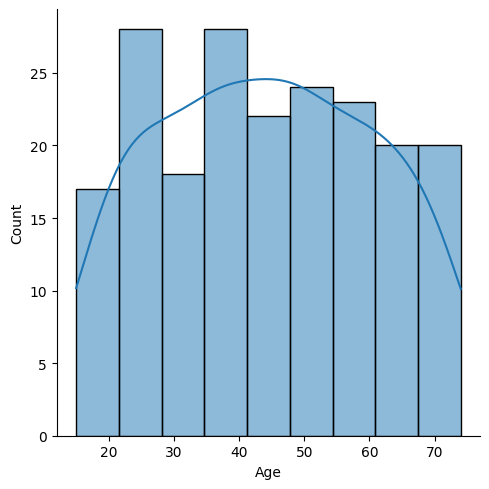

In [15]:
#Importa seaborn para tener gráficos más chidos 
import seaborn as sns
#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
plt.figure(figsize=(9,50))
#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.Age,kde=True)

In [16]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

<Axes: xlabel='BP', ylabel='Count'>

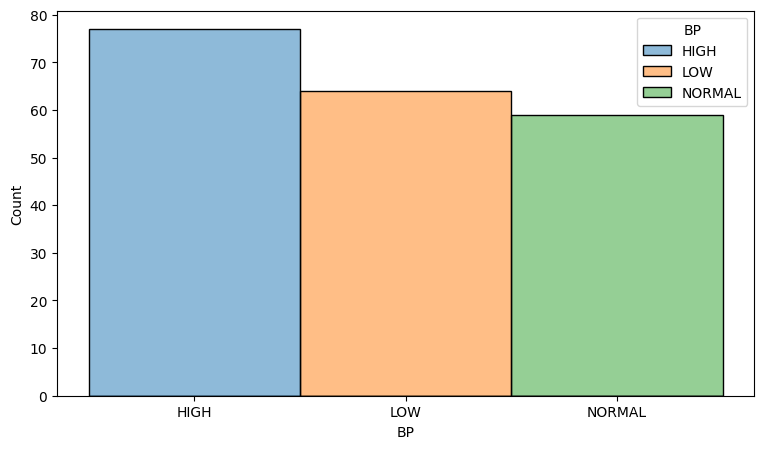

In [17]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="BP", hue="BP")

<Axes: xlabel='Cholesterol', ylabel='Count'>

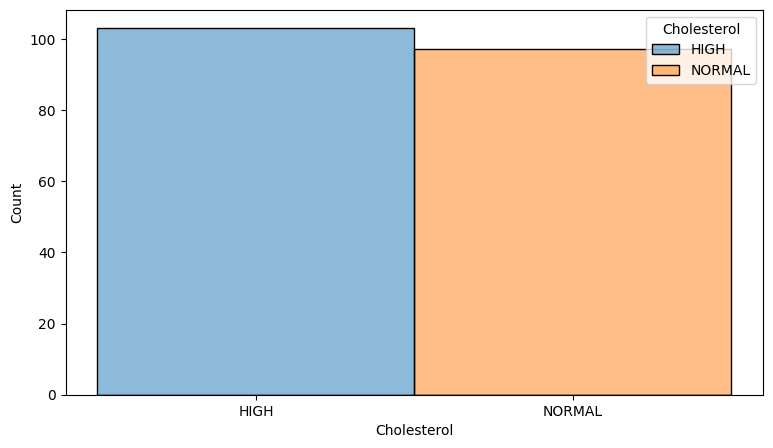

In [18]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="Cholesterol", hue="Cholesterol")

<Figure size 900x500 with 0 Axes>

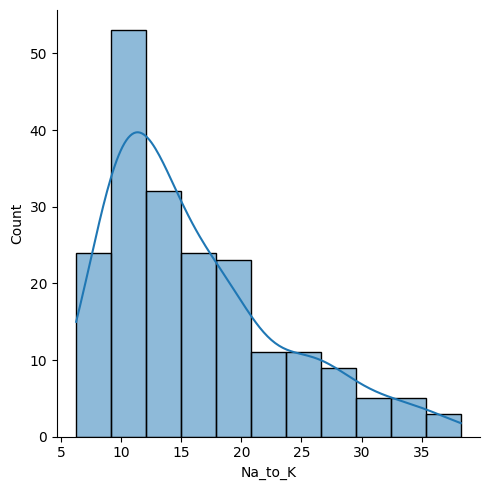

In [19]:
# Crea un displot para Sodio Potasio
plt.figure(figsize=(9,5))
sns.displot(df.Na_to_K, kde=True)

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

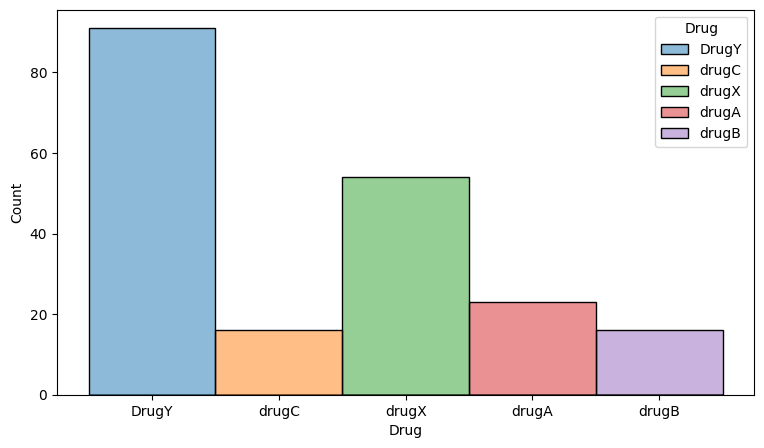

In [20]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
plt.figure(figsize=(9,5))
sns.histplot(data=df,x="Drug", hue="Drug")
#Cuenta los medicamentos
df.Drug.value_counts()

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


Text(0.5, 1.0, 'Edad/Medicamento')

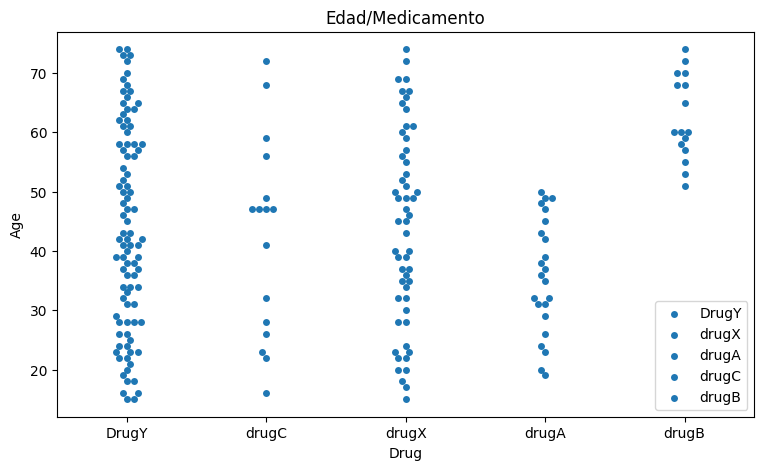

In [21]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize=(9,5))
sns.swarmplot(x="Drug", y="Age", data=df)
plt.legend(df.Drug.value_counts().index)
plt.title("Edad/Medicamento")

In [24]:
# Grafica la relación entre el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Sex_Drug = df.groupby(["Drug", "Sex"]).size().reset_index(name="Count")
df_Sex_Drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


Text(0.5, 1.0, 'Género/Medicamento')

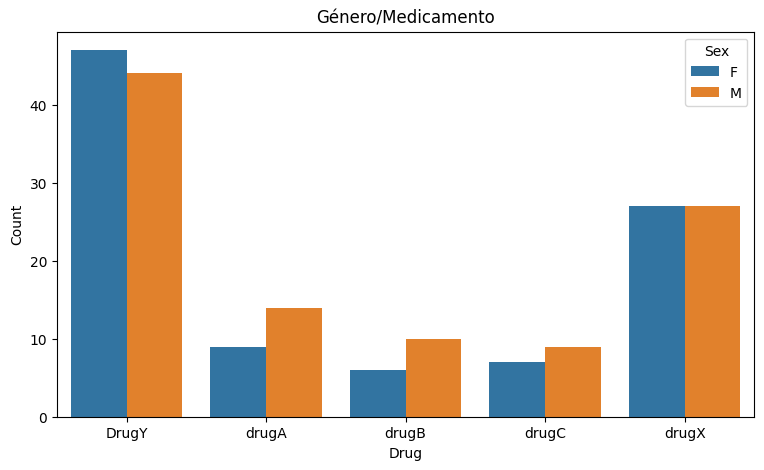

In [25]:
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Género/Medicamento")

In [27]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


Text(0.5, 1.0, 'Presión Sanguinea/Medicamentos')

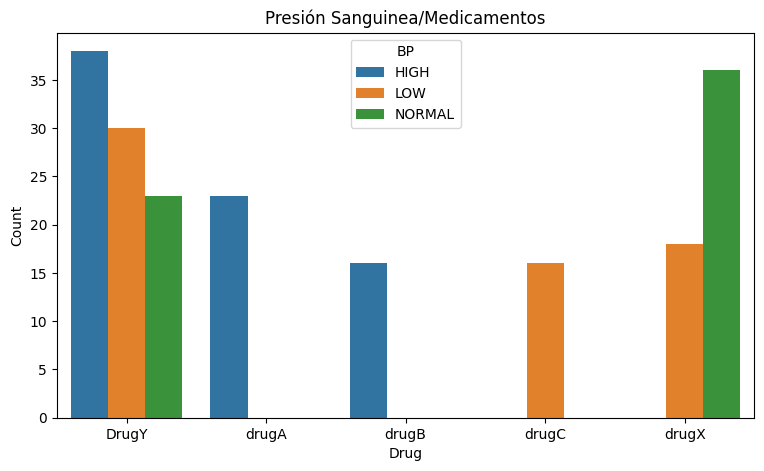

In [29]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("Presión Sanguinea/Medicamentos")

In [31]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


Text(0.5, 1.0, 'Cholesterol -- Drug')

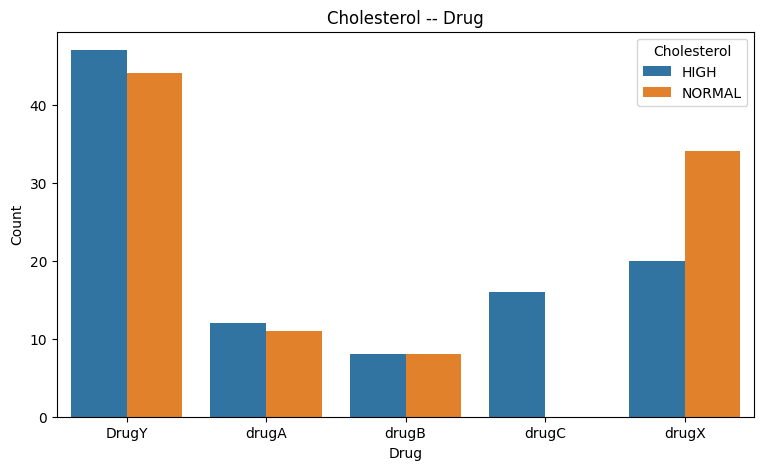

In [32]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")

Text(0.5, 1.0, 'Sodio-Potasio/Medicamentos')

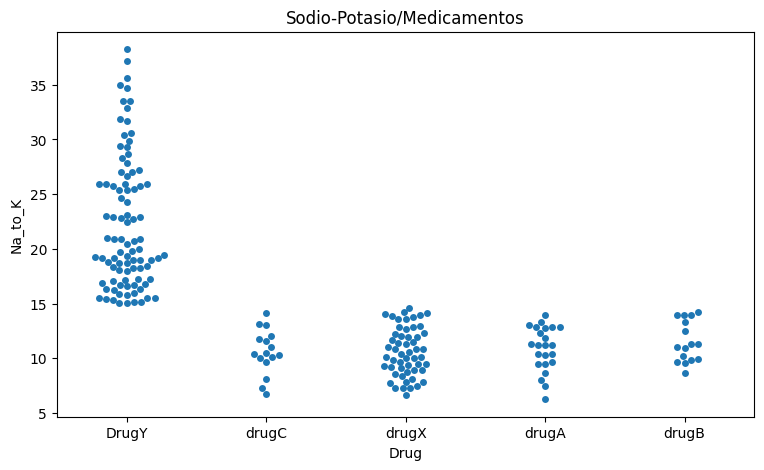

In [33]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Sodio-Potasio/Medicamentos")

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [36]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder
def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])
variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]
for l in variables:
    label_encoder(l)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [74]:
# Crear set de entrenamiento y set de prueba
x = df.drop(["Drug"],axis=1)
y = df.Drug
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y,test_size = 0.2, random_state = 42, 
    shuffle = True, stratify=y)
y_train_y = y_train == 0

El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [75]:
## Crear modelo para medicamento
from sklearn.linear_model import SGDClassifier
print(y_train_y.value_counts())

Drug
False    87
True     73
Name: count, dtype: int64


Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [78]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
sgd = SGDClassifier(random_state=42)

sgd.fit(x_train.values,y_train_y)

SGDClassifier(random_state=42)

In [90]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.predict([[41,1,1,0,8]])


array([False])

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [91]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,x_train,y_train_y,cv=3,scoring="accuracy")

array([0.81481481, 0.86792453, 0.73584906])

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [22]:
# Modelo que nunca es Y


***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [93]:
# Matriz de confusión
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict
#Importar confusion_matrix
y_train_pred = cross_val_predict(sgd,x_train,y_train_y,cv=3)
y_train_pred

array([ True, False, False,  True, False,  True, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True, False,  True,
        True, False, False,  True, False, False,  True,  True,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [95]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_y,y_train_pred)

array([[62, 25],
       [ 6, 67]])

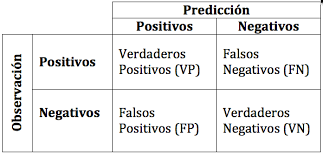

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [96]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score

p = precision_score(y_train_y,y_train_pred)

r = recall_score(y_train_y,y_train_pred)

p,r

(0.7282608695652174, 0.9178082191780822)

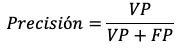

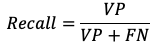

In [98]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train,y_train_y)
y_train_pred = cross_val_predict(rfc,x_train,y_train_y,cv=3)
#Hacer la matriz de confusión otra vez
confusion_matrix(y_train_y,y_train_pred)

array([[87,  0],
       [ 1, 72]])

In [99]:
#Calcular la precisión y recall con el nuevo clasificador 
p = precision_score(y_train_y,y_train_pred)

r = recall_score(y_train_y,y_train_pred)

p,r

(1.0, 0.9863013698630136)

In [105]:
#Calcular F1
from sklearn.metrics import f1_score
f1_score(y_train_y,y_train_pred)

0.993103448275862

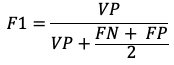

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [118]:
y_score = sgd.decision_function([[47,1,1,0,8]])

y_score

array([-17509.2823925])

In [112]:
threshold = 0
y_some_pred = (y_score > threshold)
y_some_pred

array([False])

In [114]:
threshold = 200
y_some_pred = (y_score > threshold)
y_some_pred

array([False])

In [119]:
#Puntación de un paciente aleatorio
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd,x_train,y_train_y,cv=3,method="decision_function")
precisions, recalls, umbrales = precision_recall_curve(y_train_y,y_scores)

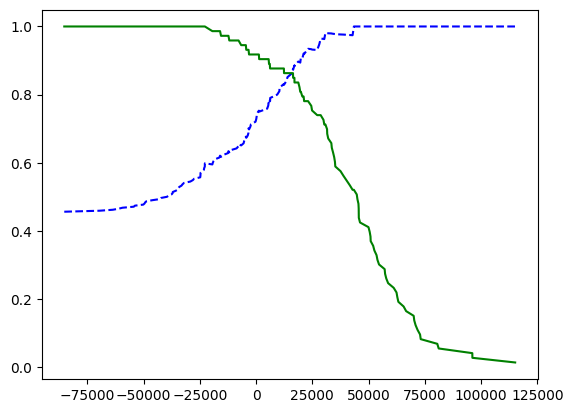

In [120]:
#Graficar la precisión y recall 
plt.plot(umbrales, precisions[:-1],"b--",label="Precisión")

plt.plot(umbrales, recalls[:-1],"g-",label="Recall")

plt.show()

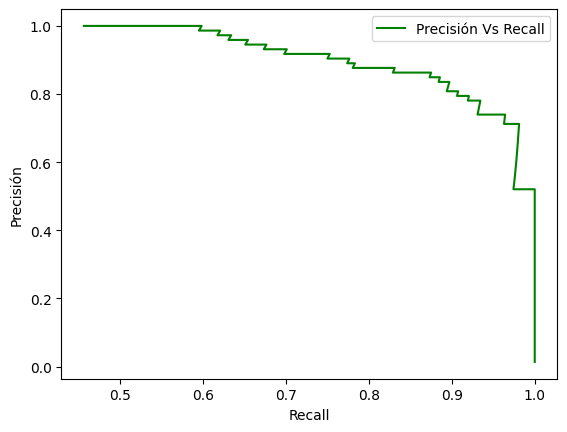

In [121]:
#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si
plt.plot(precisions[:-1], recalls[:-1],"g-",label="Precisión Vs Recall")

plt.xlabel("Recall")

plt.ylabel("Precisión")

plt.legend()

plt.show()

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [122]:
#Supon que ya lo pensaste y querías un umbral  90 
umbral_90 = umbrales[np.argmax(precisions >= 0.90)]

umbral_90

np.float64(19876.224831457526)

In [124]:
#Arroja la precisión y recall para un umbral de 90
y_train_90 = (y_scores >= umbral_90)
y_train_90

array([ True, False, False,  True, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True, False,  True,  True, False, False,  True,
        True, False, False,  True, False, False,  True,  True, False,
       False,  True, False,  True,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False,

***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [127]:
#Importar roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, umbrales = roc_curve(y_train_y,y_scores)

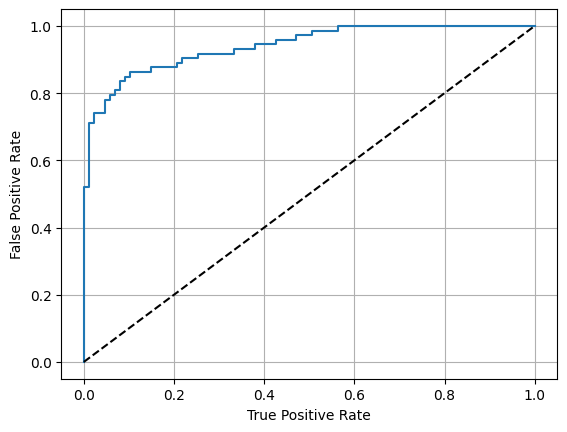

In [128]:
#Graficar la curva ROC
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
#Poner una cuadrícula
plt.grid()
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [129]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_y,y_scores)

np.float64(0.9406392694063926)

In [132]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc,x_train,y_train_y,cv=3,method="predict_proba")
y_scores_forests = y_forest[:,1]
fpr_forest, tpr_forest, umbral_forest = roc_curve(y_train_y, y_scores_forests)

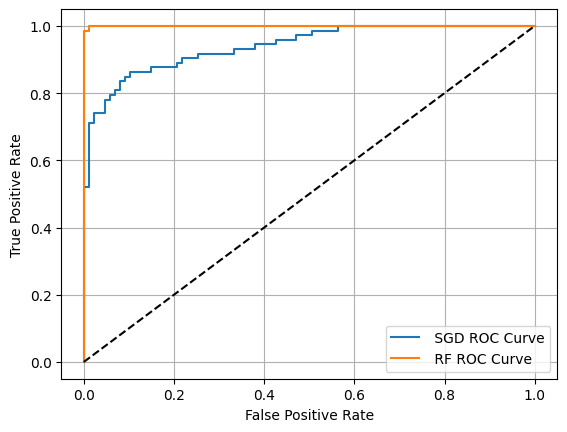

In [133]:
#Graficar la curva ROC y la predicción de random forest 
plt.plot(fpr, tpr, label=" SGD ROC Curve")
plt.plot(fpr_forest, tpr_forest, label=" RF ROC Curve")
plt.plot([0, 1],[0, 1], 'k--')
plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid()
plt.show()

In [135]:
#Calcular el puntaje (área bajo la curva) de random forest  
roc_auc_score(y_train_y,y_scores_forests)

np.float64(0.9998425444811841)

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [138]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC

#Predecir a un humano aleatorio para ver que todo este funcionando bien 
svm = SVC()

svm.fit(x_train.values,y_train)

svm.predict([[25,0,1,0,167]])

array([0])

In [ ]:
#Utilizar decision_function para observar los puntajes de cada medicina 
some_scores = svm.decision_function([[25,0,1,0,167]])
some_scores

array([[ 4.2942127 ,  1.77218896,  0.7566797 , -0.26103761,  3.16257683]])

In [141]:
#Decidirá por el qué tenga mayor puntaje
np.argmax(some_scores)

np.int64(0)

In [143]:
#Ahora, utiliza el clasificador multiclase 
from sklearn.multiclass import OneVsRestClassifier
#Predecir a un humano ahora con este clasificador
svm = OneVsRestClassifier(SVC())
svm.fit(x_train.values,y_train)
svm.predict([[25,0,1,0,167]])

array([0])

In [145]:
#Utilizar decision_function para observar los puntajes de cada medicina 
some_scores = svm.decision_function([[25,0,1,0,167]])
some_scores

array([[ 2.28316505, -1.02410502, -1.02368016, -1.00095109, -1.09291477]])

In [146]:
#campararlo con los datos obtenidos de sgd.fit 
np.argmax(some_scores)

np.int64(0)

***

## <span style="color:green">8. Analizar Errores</span>

In [148]:
#Hacer un clasificador de random forest
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)

In [149]:
#Utilizar la matriz de confusión 
conf_mz = confusion_matrix(y_train,y_train_pred)
conf_mz

array([[73,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0, 12,  1],
       [ 0,  0,  0,  0, 43]])

In [150]:
#utilizar ahora SGD
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,1
2,47,1,1,0,43,3,1
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1


## <span style="color:green">9. Clasificación Multinivel</span>

In [153]:
#Vamos a crear nuestro set de datos que acepte los medicamentos Y y A.
y_0 = (y_train == 0)
y_5 = (y_train == 5)
y_multi = np.c_[y_0,y_5]
y_multi

array([[ True, False],
       [False, False],
       [False, False],
       [ True, False],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [False, False],
       [ True, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [False, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [False, False],
       [ Tr

In [154]:
# Vamos a predecir con nuestro nuevo modelo
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train,y_multi)

knn.predict([[45,0,1,0,89]])

d:\Python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False, False]])

In [155]:
#Utilizamos el parámetro average, para decirle que nos devuelva un porcentaje, 
# en este caso con la palabra macro.
y_train_pred = cross_val_predict(knn, x_train, y_multi, cv=3)

f1_score(y_multi,y_train_pred, average="macro")

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.4931506849315068

In [156]:
# podemos decirle a la función que les de su peso correspondiente
# con la palabra weighted en average

y_train_pred = cross_val_predict(knn, x_train, y_multi, cv=3)

f1_score(y_multi,y_train_pred, average="weighted")

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.9863013698630136

In [ ]:

# Análisis de la variable Sexo
print("Distribución por género:")
print(df['Sex'].value_counts())


In [ ]:

# Análisis de la variable Presión Sanguínea (BP)
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="BP", hue="BP")
plt.title("Distribución de Presión Sanguínea")
plt.show()


In [ ]:

# Análisis de la variable Colesterol
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="Cholesterol", hue="Cholesterol")
plt.title("Distribución de Colesterol")
plt.show()


In [ ]:

# Análisis del índice Sodio-Potasio
plt.figure(figsize=(9,5))
sns.displot(df.Na_to_K, kde=True)
plt.title("Distribución del índice Sodio-Potasio")
plt.show()


In [ ]:

# Análisis de la variable Medicamento
plt.figure(figsize=(9,5))
sns.histplot(data=df, x="Drug", hue="Drug")
plt.title("Distribución de Medicamentos")
plt.show()

print("Conteo de cada tipo de medicamento:")
print(df['Drug'].value_counts())


In [ ]:

# Medicamentos vs Edad
plt.figure(figsize=(9,5))
sns.swarmplot(x="Drug", y="Age", data=df)
plt.title("Edad vs Medicamento")
plt.show()


In [ ]:

# Conteo de combinaciones Drug y Sex
df_Sex_Drug = df.groupby(["Drug", "Sex"]).size().reset_index(name="Count")
print(df_Sex_Drug)


In [ ]:

# Medicamentos vs Sexo
plt.figure(figsize=(9,5))
sns.barplot(x="Drug", y="Count", hue="Sex", data=df_Sex_Drug)
plt.title("Distribución de Medicamentos por Género")
plt.show()


In [ ]:

# Conteo de combinaciones Drug y BP
df_BP_Drug = df.groupby(["Drug", "BP"]).size().reset_index(name="Count")
print(df_BP_Drug)


In [ ]:

# Medicamentos vs Presión Sanguínea
plt.figure(figsize=(9,5))
sns.barplot(x="Drug", y="Count", hue="BP", data=df_BP_Drug)
plt.title("Distribución de Medicamentos por Presión Sanguínea")
plt.show()


In [ ]:

# Conteo de combinaciones Drug y Cholesterol
df_CH_Drug = df.groupby(["Drug", "Cholesterol"]).size().reset_index(name="Count")
print(df_CH_Drug)


In [ ]:

# Medicamentos vs Colesterol
plt.figure(figsize=(9,5))
sns.barplot(x="Drug", y="Count", hue="Cholesterol", data=df_CH_Drug)
plt.title("Distribución de Medicamentos por Colesterol")
plt.show()


In [ ]:

# Medicamentos vs Índice Sodio-Potasio
plt.figure(figsize=(9,5))
sns.swarmplot(x="Drug", y="Na_to_K", data=df)
plt.title("Sodio-Potasio vs Medicamento")
plt.show()


In [ ]:

# Importar LabelEncoder
from sklearn.preprocessing import LabelEncoder


In [ ]:

# Función para codificar variables categóricas
def label_encoder(columna):
    le = LabelEncoder()
    df[columna] = le.fit_transform(df[columna])


In [ ]:

# Convertir variables categóricas
variables = ["Sex", "BP", "Cholesterol", "Drug"]
for v in variables:
    label_encoder(v)

# Verificar resultado
df.head()


In [ ]:

# Separar X (predictores) e y (target)
X = df.drop(["Drug"], axis=1)
y = df["Drug"]


In [ ]:

# Dividir dataset en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print("Tamaño set entrenamiento:", X_train.shape)
print("Tamaño set prueba:", X_test.shape)
